Random Forest Metrics:
Accuracy: 0.9005102040816326
Precision: 0.8968609865470852
Recall: 0.9259259259259259
F1-Score: 0.9111617312072893
Confusion Matrix:
[[153  23]
 [ 16 200]]

SVM Metrics:
Accuracy: 0.9107142857142857
Precision: 0.9414634146341463
Recall: 0.8935185185185185
F1-Score: 0.9168646080760093
Confusion Matrix:
[[164  12]
 [ 23 193]]

Gradient Boosting Metrics:
Accuracy: 0.8622448979591837
Precision: 0.945054945054945
Recall: 0.7962962962962963
F1-Score: 0.864321608040201
Confusion Matrix:
[[166  10]
 [ 44 172]]

Ensemble Metrics:
Accuracy: 0.9132653061224489
Precision: 0.9333333333333333
Recall: 0.9074074074074074
F1-Score: 0.9201877934272301
Confusion Matrix:
[[162  14]
 [ 20 196]]


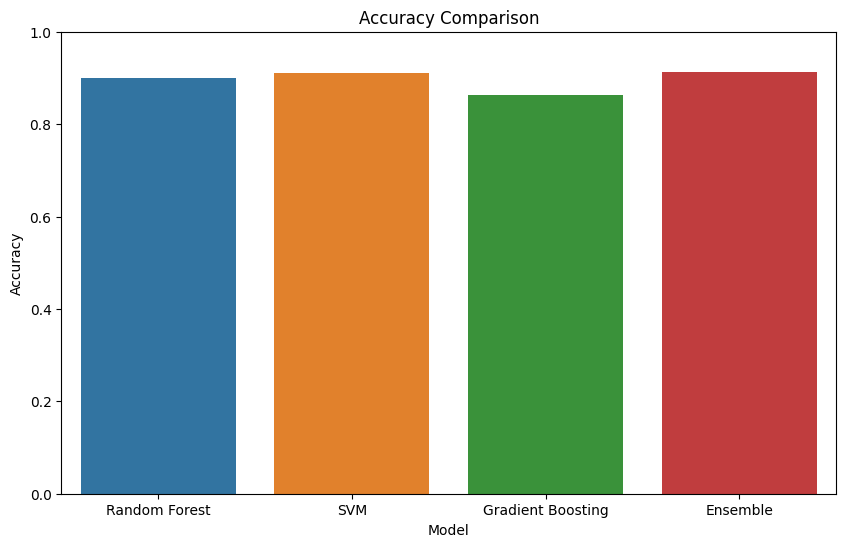

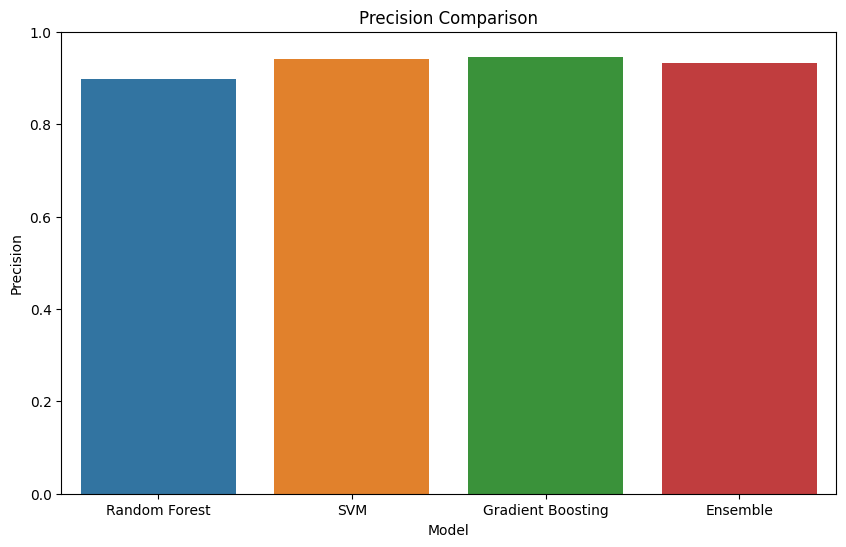

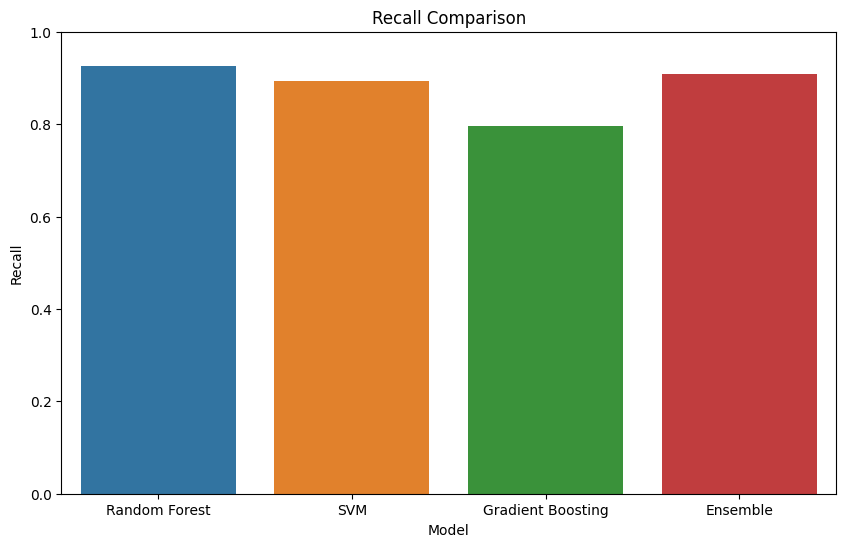

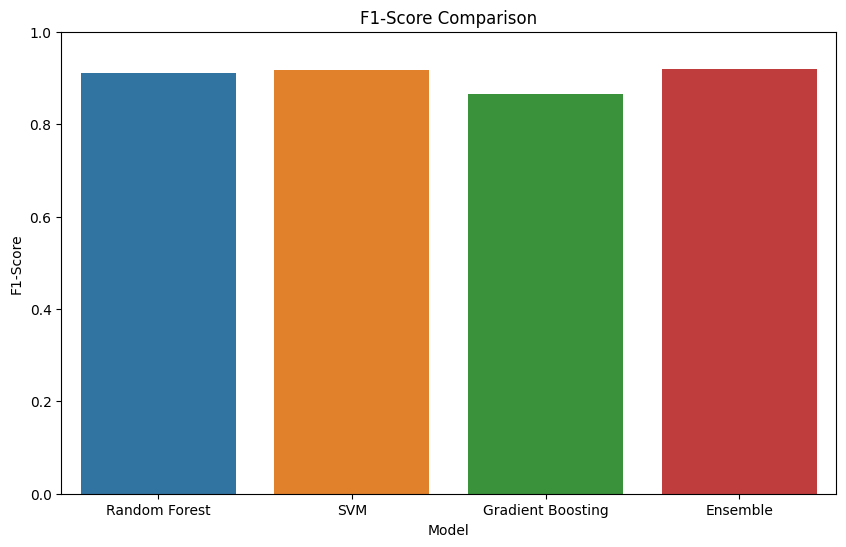

<Figure size 1600x600 with 0 Axes>

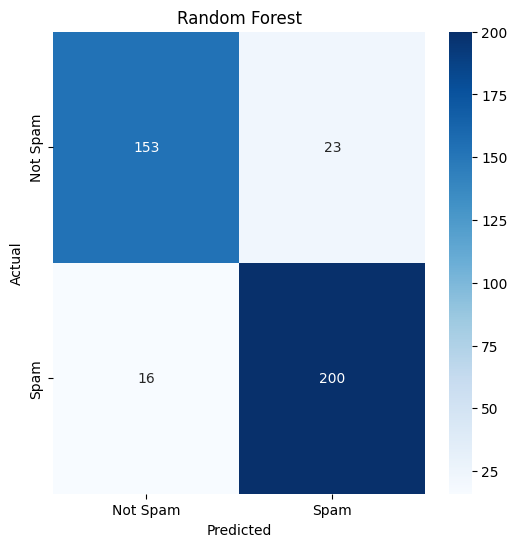

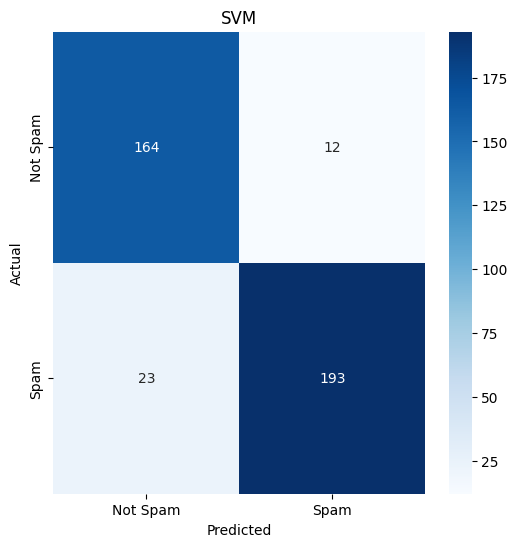

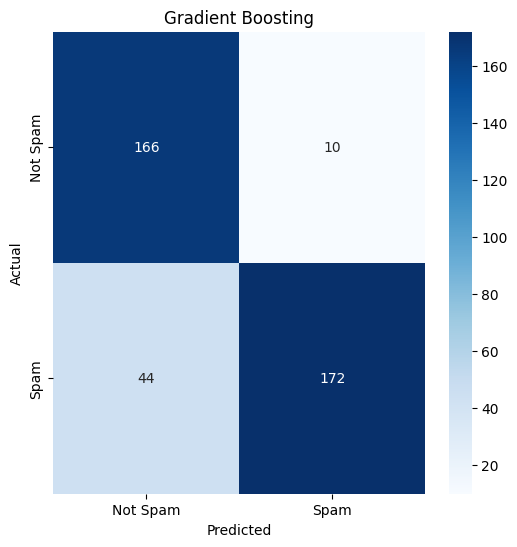

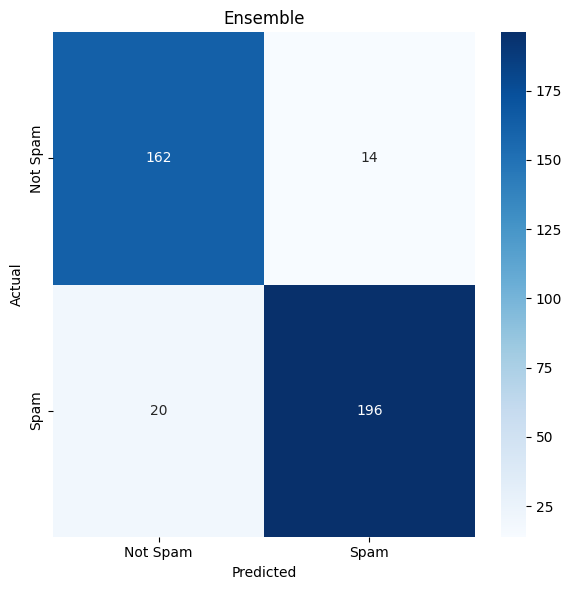

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import joblib
# Define the list of CSV files
csv_files = [
    'data/Youtube01-Psy.csv',
    'data/Youtube02-KatyPerry.csv',
    'data/Youtube03-LMFAO.csv',
    'data/Youtube04-Eminem.csv',
    'data/Youtube05-Shakira.csv'
]

# Load and combine all CSV files into a single DataFrame
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate the dataframes vertically
data = pd.concat(dataframes, ignore_index=True)

# Text preprocessing function for YouTube comments
def preprocess_comment(text):
    # Customize comment text preprocessing here
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    
    return text

# Apply text preprocessing to the 'CONTENT' column
data['CONTENT'] = data['CONTENT'].apply(preprocess_comment)

# Create a TF-IDF vectorizer to convert comment text data into feature vectors
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['CONTENT'].values)
y = data['CLASS'].values
joblib.dump(vectorizer, 'youtubeTfidfVectorizer.sav')
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train different classifiers: Random Forest, SVM, Gradient Boosting
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Enable probability estimates for VotingClassifier
gradient_boosting = GradientBoostingClassifier()

random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set for each model
rf_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)
gb_predictions = gradient_boosting.predict(X_test)

# Calculate evaluation metrics (Accuracy, Precision, Recall, F1-Score, Confusion Matrix) for each model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_confusion = confusion_matrix(y_test, svm_predictions)

gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_confusion = confusion_matrix(y_test, gb_predictions)

# Print evaluation metrics for each individual model
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("Confusion Matrix:")
print(rf_confusion)

print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)
print("Confusion Matrix:")
print(svm_confusion)

print("\nGradient Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-Score:", gb_f1)
print("Confusion Matrix:")
print(gb_confusion)

# Create an ensemble of models using a VotingClassifier with a "soft" voting strategy
ensemble = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('Gradient Boosting', gradient_boosting)
], voting='soft')

ensemble.fit(X_train, y_train)
ensemble_predictions = ensemble.predict(X_test)
joblib.dump(ensemble_predictions, 'youtubemodel.sav')
# Calculate evaluation metrics for the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)
ensemble_confusion = confusion_matrix(y_test, ensemble_predictions)

# Print evaluation metrics for the ensemble
print("\nEnsemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1-Score:", ensemble_f1)
print("Confusion Matrix:")
print(ensemble_confusion)

# Visualize performance metrics using Seaborn
metrics_data = {
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting', 'Ensemble'],
    'Accuracy': [rf_accuracy, svm_accuracy, gb_accuracy, ensemble_accuracy],
    'Precision': [rf_precision, svm_precision, gb_precision, ensemble_precision],
    'Recall': [rf_recall, svm_recall, gb_recall, ensemble_recall],
    'F1-Score': [rf_f1, svm_f1, gb_f1, ensemble_f1]
}

metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=metrics_df)
plt.title('F1-Score Comparison')
plt.ylim(0, 1)
plt.show()

# Visualize confusion matrices using Seaborn
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

plt.figure(figsize=(16, 6))
plot_confusion_matrix(rf_confusion, ['Not Spam', 'Spam'], 'Random Forest')
plot_confusion_matrix(svm_confusion, ['Not Spam', 'Spam'], 'SVM')
plot_confusion_matrix(gb_confusion, ['Not Spam', 'Spam'], 'Gradient Boosting')
plot_confusion_matrix(ensemble_confusion, ['Not Spam', 'Spam'], 'Ensemble')

plt.tight_layout()
plt.show()
